In [1]:
# import library
import pandas as pd
import numpy as np

import scipy.stats as stat
import matplotlib .pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv("train.csv",usecols=["sibsp","age","fare","survived"])

In [3]:
df.sample(5)

,survived,age,sibsp,fare
345,1,24.0,0,13.0000
51,0,21.0,0,7.8000
604,1,35.0,0,26.5500
643,1,NaN,0,56.4958
709,1,NaN,1,15.2458


In [4]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [5]:
df.head()

,survived,age,sibsp,fare
0,0,22.0,1,7.2500
1,1,38.0,1,71.2833
2,1,26.0,0,7.9250
3,1,35.0,1,53.1000
4,0,35.0,0,8.0500


In [6]:
X= df.iloc[:,1:4]
y = df.iloc[:,0]

In [7]:
X

,age,sibsp,fare
0,22.000000,1,7.2500
1,38.000000,1,71.2833
2,26.000000,0,7.9250
3,35.000000,1,53.1000
4,35.000000,0,8.0500
...,...,...,...
886,27.000000,0,13.0000
887,19.000000,0,30.0000
888,29.699118,1,23.4500
889,26.000000,0,30.0000


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\abdul\AppData\Local\Temp\ipykernel_24216\1585710324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


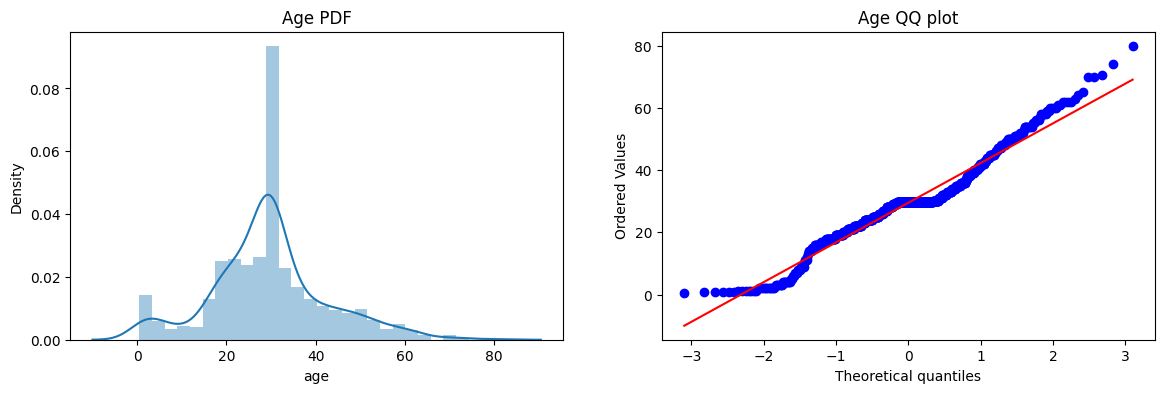

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stat.probplot(X_train['age'],dist="norm",plot=plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_24216\2611484549.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


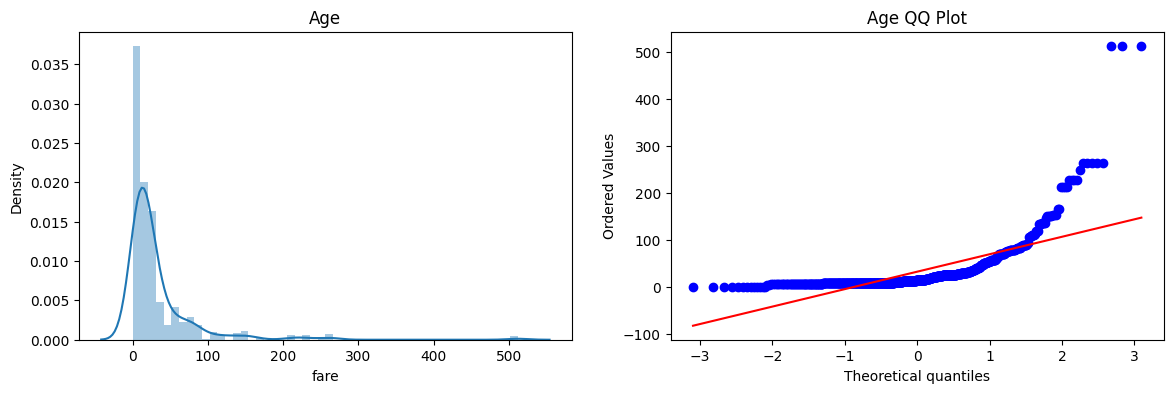

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Age')
plt.subplot(122)
stat.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
(X_train.shape),(y_train.shape)

((712, 3), (712,))

In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accure LR",accuracy_score(y_pred,y_test))
print("Accure DT",accuracy_score(y_pred1,y_test))


Accure LR 0.6815642458100558
Accure DT 0.6871508379888268


In [14]:
trf = FunctionTransformer(func = np.log1p)

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy Dt",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7039106145251397
Accuracy Dt 0.6983240223463687


In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("lR",np.mean(cross_val_score(clf,X_transformed,y,scoring="accuracy",cv=10)))
print("Dt",np.mean(cross_val_score(clf2,X_transformed,y,scoring="accuracy",cv=10)))

lR 0.7049313358302122
Dt 0.667765293383271


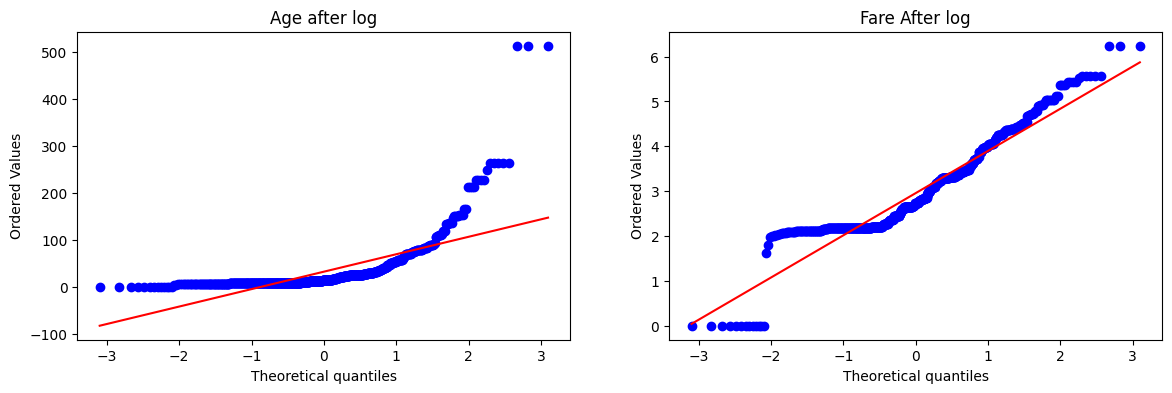

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stat.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title("Age after log")

plt.subplot(122)
stat.probplot(X_train_transformed['fare'],dist="norm",plot=plt)
plt.title('Fare After log')
plt.show()

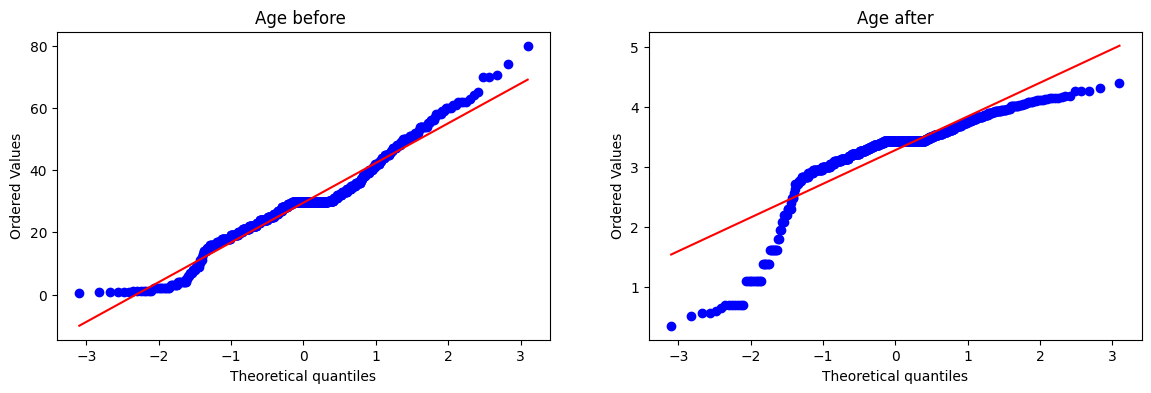

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stat.probplot(X_train['age'],dist="norm",plot=plt)
plt.title("Age before ")

plt.subplot(122)
stat.probplot(X_train_transformed['age'],dist='norm',plot=plt)
plt.title("Age after")
plt.show()


In [20]:
trf2 = ColumnTransformer([("log",FunctionTransformer(np.log1p),['fare'])],remainder="passthrough")

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_pred,y_test))
print("Accuracy DT",accuracy_score(y_pred2,y_test))



Accuracy LR 0.7094972067039106
Accuracy DT 0.6871508379888268


In [22]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring = "accuracy", cv = 10)))
print("Dt",np.mean(cross_val_score(clf2,X_transformed2,y,scoring = "accuracy", cv = 10)))


LR 0.7026466916354558
Dt 0.6599126092384519


In [28]:
X = df.iloc[:,1:4]
y = df.iloc[:,0]

print(X)
# print(y)

           age  sibsp     fare
0    22.000000      1   7.2500
1    38.000000      1  71.2833
2    26.000000      0   7.9250
3    35.000000      1  53.1000
4    35.000000      0   8.0500
..         ...    ...      ...
886  27.000000      0  13.0000
887  19.000000      0  30.0000
888  29.699118      1  23.4500
889  26.000000      0  30.0000
890  32.000000      0   7.7500

[891 rows x 3 columns]


In [23]:
df.head()

,survived,age,sibsp,fare
0,0,22.0,1,7.2500
1,1,38.0,1,71.2833
2,1,26.0,0,7.9250
3,1,35.0,1,53.1000
4,0,35.0,0,8.0500


In [29]:
def apply_transform(transform):
    X = df.iloc[:,1:4]
    y = df.iloc[:,0]
    trf = ColumnTransformer([("log",FunctionTransformer(transform),['fare'])],remainder="passthrough")
    
    X_trains  =  trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trains,y,scoring="accuracy",cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stat.probplot(X['fare'],dist="norm",plot=plt)
    plt.title('Fare before Transfrom')
    
    plt.subplot(122)
    stat.probplot(X_trains[:,0],dist="norm",plot=plt)
    plt.title('Fare After Transfrom')
    
    plt.show()
    
    

Accuracy 0.6846941323345817


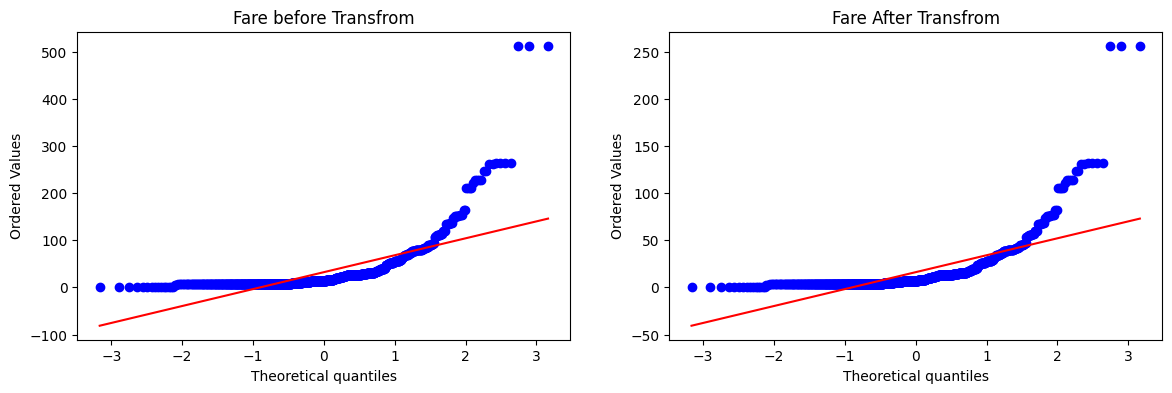

In [30]:
apply_transform(lambda x: x**1/2)